In [61]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

#pull API data for global assessment, pseudo-random n = 10,000
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/page/0?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
global_assessment_species = response.json()
global_sample_species_df = pd.DataFrame(global_assessment_species["result"])
global_sample_species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   taxonid              10000 non-null  int64 
 1   kingdom_name         10000 non-null  object
 2   phylum_name          10000 non-null  object
 3   class_name           10000 non-null  object
 4   order_name           10000 non-null  object
 5   family_name          10000 non-null  object
 6   genus_name           10000 non-null  object
 7   scientific_name      10000 non-null  object
 8   taxonomic_authority  9952 non-null   object
 9   infra_rank           349 non-null    object
 10  infra_name           349 non-null    object
 11  population           23 non-null     object
 12  category             10000 non-null  object
 13  main_common_name     6804 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [65]:
global_sample_species_df

,taxonid,kingdom_name,phylum_name,class_name,order_name,family_name,genus_name,scientific_name,taxonomic_authority,infra_rank,infra_name,population,category,main_common_name
0,3,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta angaurana,"Solem, 1976",None,None,None,CR,None
1,4,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta constricta,"(Semper, 1874)",None,None,None,EN,None
2,5,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta fuscozonata,"(Beddome, 1889)",None,None,None,EN,None
3,6,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta irregularis,"Semper, 1874",None,None,None,CR,None
4,7,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta kinlochi,"Solem, 1976",None,None,None,CR,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31578,PLANTAE,TRACHEOPHYTA,MAGNOLIOPSIDA,MYRTALES,MYRTACEAE,Eugenia,Eugenia klossii,Ridley,None,None,None,CR,None
9996,31579,PLANTAE,TRACHEOPHYTA,MAGNOLIOPSIDA,MYRTALES,MYRTACEAE,Eugenia,Eugenia koordersiana,King,None,None,None,LC,None
9997,31580,PLANTAE,TRACHEOPHYTA,MAGNOLIOPSIDA,MYRTALES,MYRTACEAE,Eugenia,Eugenia laevicaulis,Duthie,None,None,None,LC,None
9998,31581,PLANTAE,TRACHEOPHYTA,MAGNOLIOPSIDA,MYRTALES,MYRTACEAE,Eugenia,Eugenia myriantha,King,None,None,None,DD,None


In [63]:
#clean up data, "category" has some sub-categories that we will merge into a single category
global_sample_species_df['category'].replace({'LR/cd': 'CD', 'LR/lc': 'LC', 'LR/nt' : 'NT'}, inplace=True)
global_sample_species_df['category'].unique()

array(['CR', 'EN', 'DD', 'EX', 'NT', 'VU', 'EW', 'LC', 'CD'], dtype=object)

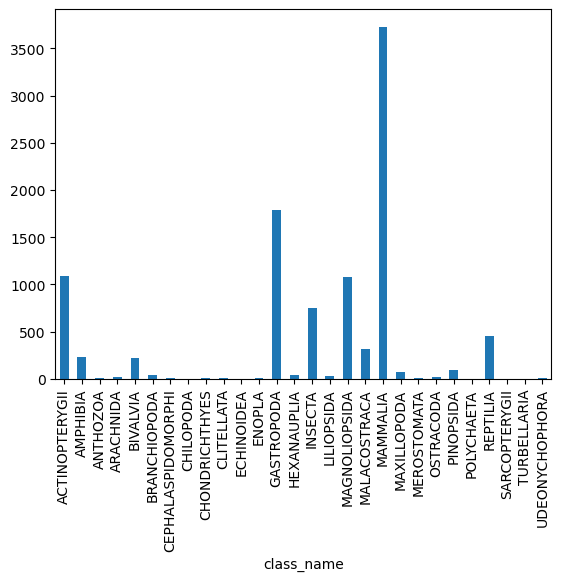

In [68]:
#look at how observations are distributed across Class
classes_count_global_sample = global_sample_species_df.groupby("class_name").count()
classes_plot = classes_count_global_sample["taxonid"].plot(kind = 'bar')

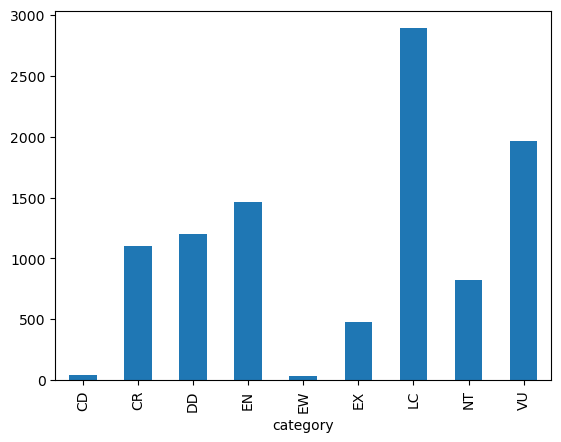

In [48]:
#look at how observations are distributed across threatened categories
categories_count_global_sample = global_sample_species_df.groupby("category").count()
categories_plot = categories_count_global_sample["taxonid"].plot(kind = 'bar')

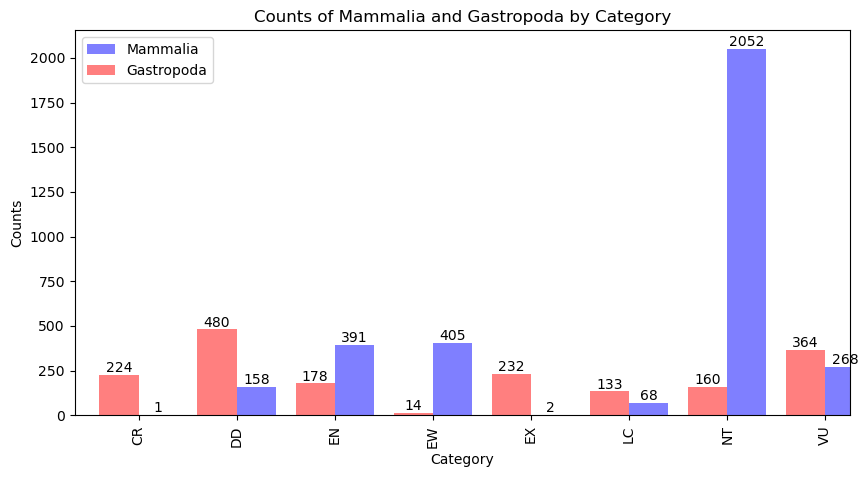

In [64]:
#look at two Classes with largest sample sizes and compare distribution across categories
mammalia = global_sample_species_df[global_sample_species_df["class_name"] == "MAMMALIA"]
counts_mammalia = mammalia.groupby('category').count()['taxonid']

gastropoda = global_sample_species_df[global_sample_species_df["class_name"] == "GASTROPODA"]
counts_gastropoda = gastropoda.groupby('category').count()['taxonid']

fig, ax = plt.subplots(figsize=(10, 5))
classes_category_plot = counts_mammalia.plot(kind='bar', color='blue', alpha=0.5, position=0, width=0.4)
counts_gastropoda.plot(kind='bar', color='red', alpha=0.5, position=1, width=0.4, ax=classes_category_plot)
classes_category_plot.set_xlabel('Category')
classes_category_plot.set_ylabel('Counts')
classes_category_plot.legend(['Mammalia', 'Gastropoda'])
classes_category_plot.set_title('Counts of Mammalia and Gastropoda by Category')
for i in classes_category_plot.containers:
    classes_category_plot.bar_label(i, label_type='edge', fontsize=10)
    
plt.savefig('classes_counts_of_categories.png')

In [ ]:
combo_df = df[(df["class"]=="Gastropoda")|(df["Class"] == "Mammalia")]
combo_df.groupby

In [44]:
#check values in kingdom_name
global_sample_species_df['kingdom_name'].unique()

array(['ANIMALIA', 'PLANTAE'], dtype=object)

In [70]:
#make a contingency table expressing the hypothesis that "kingdom_name" is a predictor of the frequency in levels of "category"
contingency_table_kingdom_category = pd.crosstab(global_sample_species_df['kingdom_name'], global_sample_species_df['category'], margins=True)
print(contingency_table_kingdom_category)
#export observed counts table
contingency_table_kingdom_category.to_csv('crosstab_kingdom.csv', index=True)

category      CD    CR    DD    EN  EW   EX    LC   NT    VU    All
kingdom_name                                                       
ANIMALIA      19   895  1149  1186  29  469  2730  719  1611   8807
PLANTAE       27   206    54   276   4   12   161  103   350   1193
All           46  1101  1203  1462  33  481  2891  822  1961  10000


In [46]:
#run chi-square test of independence on contingency table
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table_kingdom_category)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 492.2431018071264
P-value: 4.453847903349025e-93
Degrees of freedom: 18
Expected frequencies:
[[4.0512200e+01 9.6965070e+02 1.0594821e+03 1.2875834e+03 2.9063100e+01
  4.2361670e+02 2.5461037e+03 7.2393540e+02 1.7270527e+03 8.8070000e+03]
 [5.4878000e+00 1.3134930e+02 1.4351790e+02 1.7441660e+02 3.9369000e+00
  5.7383300e+01 3.4489630e+02 9.8064600e+01 2.3394730e+02 1.1930000e+03]
 [4.6000000e+01 1.1010000e+03 1.2030000e+03 1.4620000e+03 3.3000000e+01
  4.8100000e+02 2.8910000e+03 8.2200000e+02 1.9610000e+03 1.0000000e+04]]


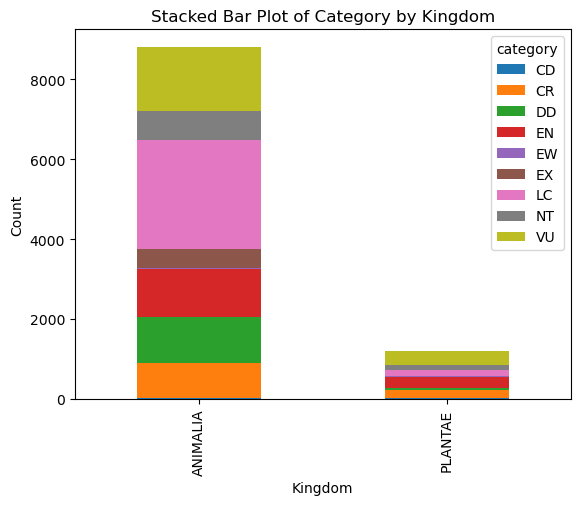

In [47]:
#use data to plot stacked bar plot showing frequencies of category by kingdom
grouped = global_sample_species_df.groupby(['kingdom_name', 'category']).size().unstack()
# Plot the stacked bar plot
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Kingdom')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Category by Kingdom')

# Show the plot
plt.show()

In [73]:
#export expected counts table
expected_df = pd.DataFrame(expected, index=contingency_table_kingdom_category.index, columns=contingency_table_kingdom_category.columns)
expected_df.to_csv('expected_frequencies_kingdom.csv', index=True)
expected_df

category,CD,CR,DD,EN,EW,EX,LC,NT,VU,All
kingdom_name,,,,,,,,,,
ANIMALIA,40.5122,969.6507,1059.4821,1287.5834,29.0631,423.6167,2546.1037,723.9354,1727.0527,8807.0
PLANTAE,5.4878,131.3493,143.5179,174.4166,3.9369,57.3833,344.8963,98.0646,233.9473,1193.0
All,46.0000,1101.0000,1203.0000,1462.0000,33.0000,481.0000,2891.0000,822.0000,1961.0000,10000.0


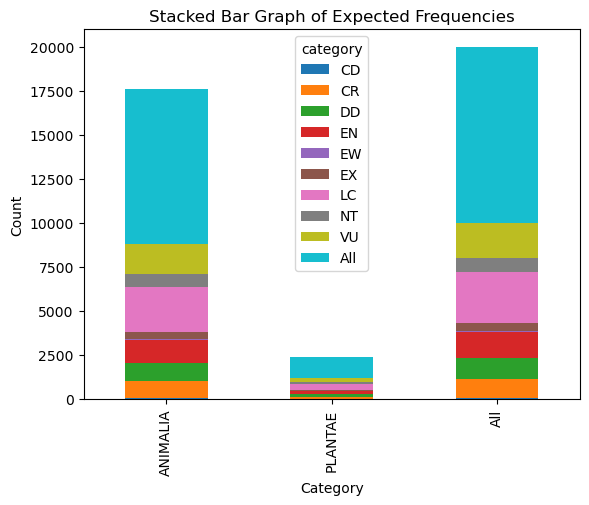

In [74]:
#plot expected counts, note that erroneously plotting "all" but can't fix and rerun code because API is down
expected_df.plot.bar(stacked=True)
plt.title("Stacked Bar Graph of Expected Frequencies")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

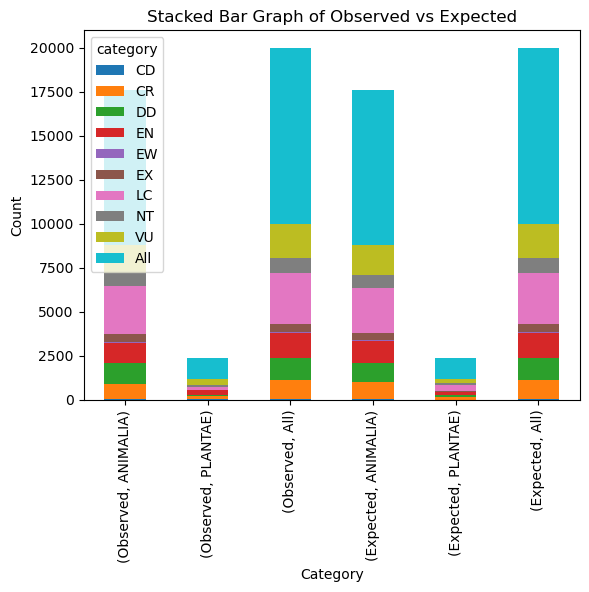

In [76]:
#plot observed and expected counts on one graph, again erroneously plotting "all" but can't fix at this time
expected_observed_df = pd.concat([contingency_table_kingdom_category, expected_df], keys=["Observed", "Expected"])
expected_observed_df.plot.bar(stacked=True)
plt.title("Stacked Bar Graph of Observed vs Expected")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [77]:
expected_observed_df

category                    CD         CR         DD         EN       EW  \
         kingdom_name                                                      
Observed ANIMALIA      19.0000   895.0000  1149.0000  1186.0000  29.0000   
         PLANTAE       27.0000   206.0000    54.0000   276.0000   4.0000   
         All           46.0000  1101.0000  1203.0000  1462.0000  33.0000   
Expected ANIMALIA      40.5122   969.6507  1059.4821  1287.5834  29.0631   
         PLANTAE        5.4878   131.3493   143.5179   174.4166   3.9369   
         All           46.0000  1101.0000  1203.0000  1462.0000  33.0000   

category                     EX         LC        NT         VU      All  
         kingdom_name                                                     
Observed ANIMALIA      469.0000  2730.0000  719.0000  1611.0000   8807.0  
         PLANTAE        12.0000   161.0000  103.0000   350.0000   1193.0  
         All           481.0000  2891.0000  822.0000  1961.0000  10000.0  
Expected ANIMALIA      423.6167  2546.1037  723.9354  1727.0527   8807.0  
         PLANTAE        57.3833   344.8963   98.0646   233.9473   1193.0  
         All           481.0000  2891.0000  822.0000  1961.0000  10000.0